In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [33]:
os.environ['OMP_NUM_THREADS'] = '1'

In [65]:
df_mn= pd.read_csv('mnist.csv', header=None)

In [69]:
df_mn = df_mn.loc[:, (df_mn != 0).any(axis=0)]
print(df_mn.describe())

              0           38          39          40          66         67   \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.00000   
mean     4.378000    0.026000    0.448000    0.372000    0.576000    1.39000   
std      2.873958    0.581378   10.017585    8.318173    9.232264   17.85013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%      2.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
50%      4.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
75%      7.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
max      9.000000   13.000000  224.000000  186.000000  191.000000  255.00000   

              68          69          70          71   ...         746  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     2.276000    2.956000    2.864000    1.220000  ...    4.158000   
std     20.316036   22.396099   22.681146   12.260679  ..

In [71]:
from sklearn.preprocessing import StandardScaler
X=df_mn
X_mn_norm = StandardScaler().fit_transform(X) # normalizing the features
X_mn_norm[:6,:]


array([[ 0.91324432, -0.04476615, -0.04476615, ..., -0.05151044,
        -0.04476615, -0.04476615],
       [-0.82825896, -0.04476615, -0.04476615, ..., -0.05151044,
        -0.04476615, -0.04476615],
       [-1.17655962, -0.04476615, -0.04476615, ..., -0.05151044,
        -0.04476615, -0.04476615],
       [-1.52486028, -0.04476615, -0.04476615, ..., -0.05151044,
        -0.04476615, -0.04476615],
       [-0.13165765, -0.04476615, -0.04476615, ..., -0.05151044,
        -0.04476615, -0.04476615],
       [-1.17655962, -0.04476615, -0.04476615, ..., -0.05151044,
        -0.04476615, -0.04476615]])

In [73]:
from sklearn.decomposition import PCA
pca_X= PCA(n_components=2)
pc_X_mn = pca_X.fit_transform(X_mn_norm)
pc_X_mn[:6,:]

array([[ -4.52845874,   4.19776728],
       [  5.02581332, -12.46609731],
       [ -6.90743649,  -5.89060457],
       [  8.58417912,  -0.33748912],
       [  1.10589204,   6.57723696],
       [ -7.5633338 ,  -5.60830259]])

C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

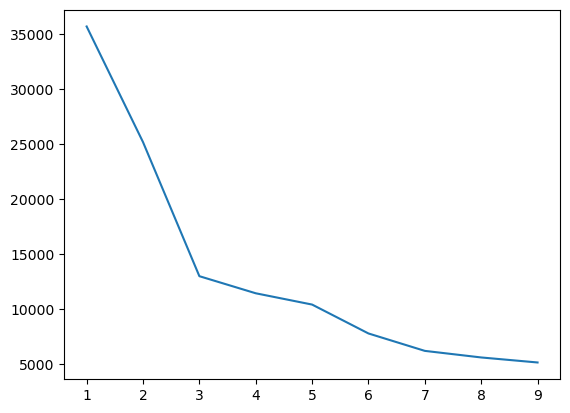

In [85]:
# Elbow method
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_mn__km = kmeans.fit_predict(pc_X_mn)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

In [117]:
# The most optimal number of clusters is 3" 
kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)
y_mn_km = kmeans.fit_predict(pc_X_mn)
kmeans.labels_

C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2,
       2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1,
       1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0,

In [119]:
kmeans.cluster_centers_

array([[-2.81541177, -3.48251655],
       [-1.84303619,  6.17272519],
       [10.79465118, -1.34752094]])

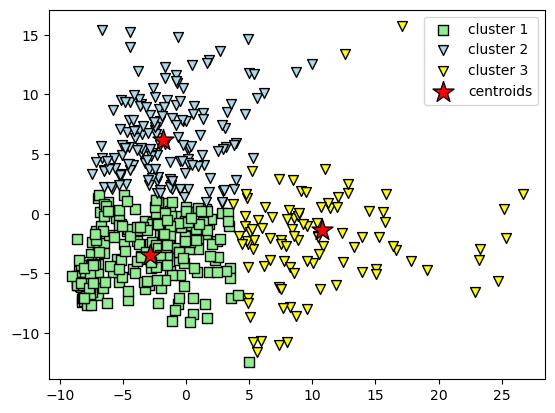

In [121]:
plt.scatter(
    pc_X_mn[y_mn_km == 0, 0], pc_X_mn[y_mn_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    pc_X_mn[y_mn_km == 1, 0], pc_X_mn[y_mn_km == 1, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    pc_X_mn[y_mn_km == 2, 0], pc_X_mn[y_mn_km == 2, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 3'
)
# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

In [135]:
df= pd.read_csv('data_2d.csv', header=None)
df.head(4)

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400


In [137]:
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


In [139]:
X=df
X_norm = StandardScaler().fit_transform(X) # normalizing the features
X_norm[:6,:]


array([[-1.        , -2.04352628, -1.09335983],
       [-1.        ,  0.75105098,  0.09709163],
       [-1.        , -1.58484322, -1.08738314],
       [-1.        , -0.93007208, -0.61586796],
       [-1.        , -1.48855482, -0.67094181],
       [-1.        ,  0.26209733,  0.30164454]])

C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

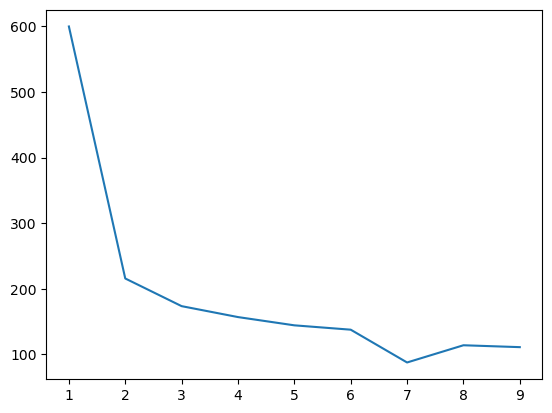

In [143]:
# Elbow method
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_km = kmeans.fit_predict(X_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

In [145]:
kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)
y_km = kmeans.fit_predict(X_norm)
kmeans.labels_

C:\Users\natal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [157]:
kmeans.cluster_centers_

array([[-0.96078431, -0.54301659, -0.79258183],
       [ 1.        ,  0.56518053,  0.82493211]])

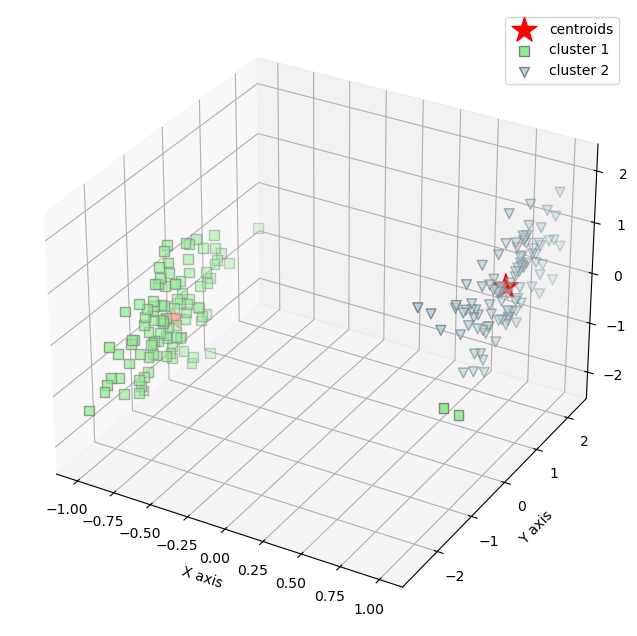

In [219]:
fig = plt.figure(figsize= (8,8))
ax = fig.add_subplot(111, projection='3d')


# centroids
ax.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
   s=350, marker='*',
    c='red', edgecolor='red',
    label='centroids'
)
#cluster 1
ax.scatter(
    X_norm[y_km == 0, 0], X_norm[y_km == 0, 1], X_norm[y_km == 0, 2],
    s=50, c='lightgreen',
    marker='s', edgecolor='grey',
    label='cluster 1'
)

# cluster 2
ax.scatter(
    X_norm[y_km == 1, 0], X_norm[y_km == 1, 1], X_norm[y_km == 1, 2],
    s=50, c='lightblue',
    marker='v', edgecolor='grey',
    label='cluster 2')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Legg til en legende
ax.legend(scatterpoints=1)

# Vis plottet
plt.show()